In [239]:
%load_ext autoreload
%autoreload 2

import pickle

from config import Config

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import TABLEAU_COLORS
import numpy as np

from utility import format_decomp_name, format_dataset_name, format_algorithm_name

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Times New Roman"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
RESULTS_EXP_1_FOLDER = "results/experiment_1/"
RESULTS_EXP_2_FOLDER = "results/experiment_2/"
c = Config()
algorithm_names = c.algorithm_names_input_decomp

In [241]:
evaluation_metric = "mae"
all_errors_exp1 = np.full((len(algorithm_names),len(c.dataset_names),len(c.decomp_input_names), len(c.metrics)), -1.0)
all_errors_exp2 = np.full((len(algorithm_names),len(c.dataset_names),len(c.decomp_input_names), len(c.metrics)), -1.0)

for i, algorithm in enumerate(algorithm_names):
    for j, dataset in enumerate(c.dataset_names):
        folder = RESULTS_EXP_1_FOLDER + algorithm + "/"
        with open(folder + dataset + ".pkl", "rb") as file:
            errors = pickle.load(file)
            for k, decomp in enumerate(c.decomp_input_names):
                for l, metric in enumerate(c.metrics):
                    if decomp not in errors.keys():
                        # trend-seasonality doesnt work for all datasets (due to non-existant period)
                        all_errors_exp1[i,j,k,l] = None
                        continue
                    all_errors_exp1[i,j,k,l] = errors[decomp][metric]
        folder = RESULTS_EXP_2_FOLDER + algorithm + "/"
        with open(folder + dataset + ".pkl", "rb") as file:
            errors = pickle.load(file)
            for k, decomp in enumerate(c.decomp_input_names):
                for l, metric in enumerate(c.metrics):
                    if decomp not in errors.keys():
                        # trend-seasonality doesnt work for all datasets (due to non-existant period)
                        all_errors_exp2[i,j,k,l] = None
                        continue
                    all_errors_exp2[i,j,k,l] = errors[decomp][metric]
mae_exp1 = all_errors_exp1[...,c.metrics.index(evaluation_metric)]
mae_exp2 = all_errors_exp2[...,c.metrics.index(evaluation_metric)]

In [242]:
error_reduction_exp1 = 100 * -(mae_exp1[:,:,1:] - mae_exp1[:,:,:1]) / mae_exp1[:,:,:1]
error_reduction_exp2 = 100 * -(mae_exp2[:,:,1:] - mae_exp2[:,:,:1]) / mae_exp2[:,:,:1]

In [ ]:
print("\\begin{table}[h]")
print("\centering")
print("\caption{Error reduction from using no decomposition for unaltered forecasting models under a fixed-input setup.}")
print("\\begin{tabular}{c|c", end="")
for _ in range(len(c.dataset_names)):
    print("|c",end="")
print("}")
print(" &",end="")
for dataset in c.dataset_names:
    print(f" & {format_dataset_name(dataset,long=False)}",end="")
print("\\\\")
print("\midrule")

rows = []
for algorithm in algorithm_names:
    rows.append("\multirow{3}{*}{\\footnotesize{\\rotatebox{90}{" + format_algorithm_name(algorithm,long=False) + "}}} & Mean ")
    rows.append(" & Max ")
    rows.append(" & Decomp ")

for i, dataset in enumerate(c.dataset_names):
    means = error_reduction_exp1[:,i,:]
    mean = np.nanmean(means,axis=1)
    max = np.nanmax(means,axis=1)
    max_indices = np.nanargmax(means,axis=1)
    for j, name in enumerate(algorithm_names):
        rows[j*3] += "& {:.2f}\% ".format(mean[j])
    for j, name in enumerate(algorithm_names):
        rows[(j*3)+1] += "& {:.2f}\% ".format(max[j])
        rows[(j*3)+2] += "& {} ".format(format_decomp_name(c.decomp_input_names[max_indices[j]+1],long=False))

for i, row in enumerate(rows):
    print(row + "\\\\")
    if i > 0 and (i+1) % 3 == 0 and i < len(rows)-1:
        print("\midrule")

print("\end{tabular}")
print("\label{tab:error_reduction_unaltered_models_fixed_input}")
print("\end{table}")

\begin{table}[h]
\centering
\caption{Error reduction from using no decomposition for unaltered forecasting models under a fixed-input setup.}
\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c|c|c}
 & & M4(H) & Weather & Trans. & CIF & Rain & M4(Y) & Covid & ETTh1 & Exch. & Illness & Walmart\\
\midrule
\multirow{3}{*}{\footnotesize{\rotatebox{90}{DLinear}}} & Mean & -1.19\% & 0.25\% & 0.20\% & -40.63\% & -5.45\% & -1.44\% & -48.91\% & 0.16\% & -2.84\% & -3.45\% & -0.09\% \\
 & Max & -0.66\% & 0.30\% & 0.72\% & -28.71\% & -4.01\% & -0.35\% & -15.38\% & 0.21\% & 2.03\% & -0.67\% & -0.02\% \\
 & Decomp & MA & F(BL) & STL & MA & F(k) & MA & F(k) & Wav & TS & MA & Wav \\
\midrule
\multirow{3}{*}{\footnotesize{\rotatebox{90}{NST}}} & Mean & 1.28\% & -0.28\% & 0.82\% & -16.17\% & -1.78\% & 8.05\% & 4.29\% & 0.22\% & 0.10\% & -2.86\% & 1.47\% \\
 & Max & 6.81\% & 0.71\% & 1.97\% & 4.25\% & 3.72\% & 14.80\% & 7.54\% & 0.56\% & 4.67\% & -0.81\% & 3.28\% \\
 & Decomp & Wav & Wav & MA & MA & Wav & Wav & F(BL) 

In [ ]:
print("\\begin{table}[h]")
print("\centering")
print("\caption{Error reduction from using no decomposition for unaltered forecasting models under an expanding-input setup.}")
print("\\begin{tabular}{c|c", end="")
for _ in range(len(c.dataset_names)):
    print("|c",end="")
print("}")
print(" &",end="")
for dataset in c.dataset_names:
    print(f" & {format_dataset_name(dataset,long=False)}",end="")
print("\\\\")
print("\midrule")

rows = []
for algorithm in algorithm_names:
    rows.append("\multirow{3}{*}{\\footnotesize{\\rotatebox{90}{" + format_algorithm_name(algorithm,long=False) + "}}} & Mean ")
    rows.append(" & Max ")
    rows.append(" & Decomp ")

for i, dataset in enumerate(c.dataset_names):
    means = error_reduction_exp2[:,i,:]
    mean = np.nanmean(means,axis=1)
    max = np.nanmax(means,axis=1)
    max_indices = np.nanargmax(means,axis=1)
    for j, name in enumerate(algorithm_names):
        rows[j*3] += "& {:.2f}\% ".format(mean[j])
    for j, name in enumerate(algorithm_names):
        rows[(j*3)+1] += "& {:.2f}\% ".format(max[j])
        rows[(j*3)+2] += "& {} ".format(format_decomp_name(c.decomp_input_names[max_indices[j]+1],long=False))

for i, row in enumerate(rows):
    print(row + "\\\\")
    if i > 0 and (i+1) % 3 == 0 and i < len(rows)-1:
        print("\midrule")

print("\end{tabular}")
print("\label{tab:error_reduction_unaltered_models_expanding_input}")
print("\end{table}")

\begin{table}[h]
\centering
\caption{Error reduction from using no decomposition for unaltered forecasting models under an expanding-input setup.}
\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c|c|c}
 & & M4(H) & Weather & Trans. & CIF & Rain & M4(Y) & Covid & ETTh1 & Exch. & Illness & Walmart\\
\midrule
\multirow{3}{*}{\footnotesize{\rotatebox{90}{DLinear}}} & Mean & -2.25\% & 0.33\% & -2.68\% & -97.27\% & -6.73\% & -1.30\% & 3.04\% & -1.68\% & -12.49\% & -5.79\% & -0.57\% \\
 & Max & -0.66\% & 0.62\% & 0.42\% & -56.80\% & -4.01\% & -0.34\% & 5.14\% & 1.17\% & 3.06\% & -1.18\% & 0.05\% \\
 & Decomp & MA & Wav & MA & MA & MA & F(k) & Wav & STL & Wav & MA & F(k) \\
\midrule
\multirow{3}{*}{\footnotesize{\rotatebox{90}{NST}}} & Mean & -130.95\% & 2.37\% & 2.01\% & -9.84\% & 2.41\% & 2.04\% & 3.15\% & 3.02\% & -0.89\% & -2.21\% & 0.43\% \\
 & Max & 3.15\% & 8.99\% & 3.63\% & -0.64\% & 22.06\% & 8.52\% & 7.80\% & 15.29\% & 5.37\% & -0.50\% & 3.09\% \\
 & Decomp & F(BL) & F(k) & MA & Wav & TS & Wav &

In [245]:
# error_reduction_exp1 = np.nanmax(error_reduction_exp1,axis=-1,keepdims=True)
# error_reduction_exp2 = np.nanmax(error_reduction_exp2,axis=-1,keepdims=True)

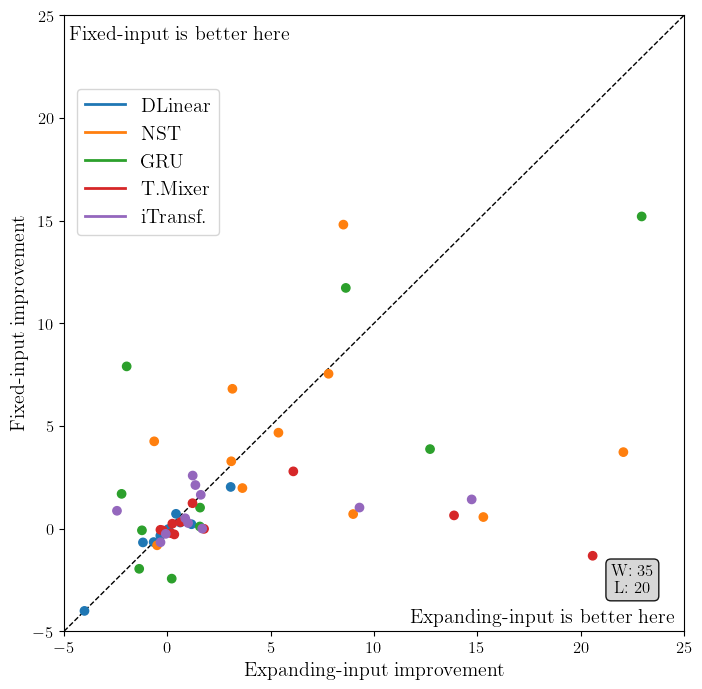

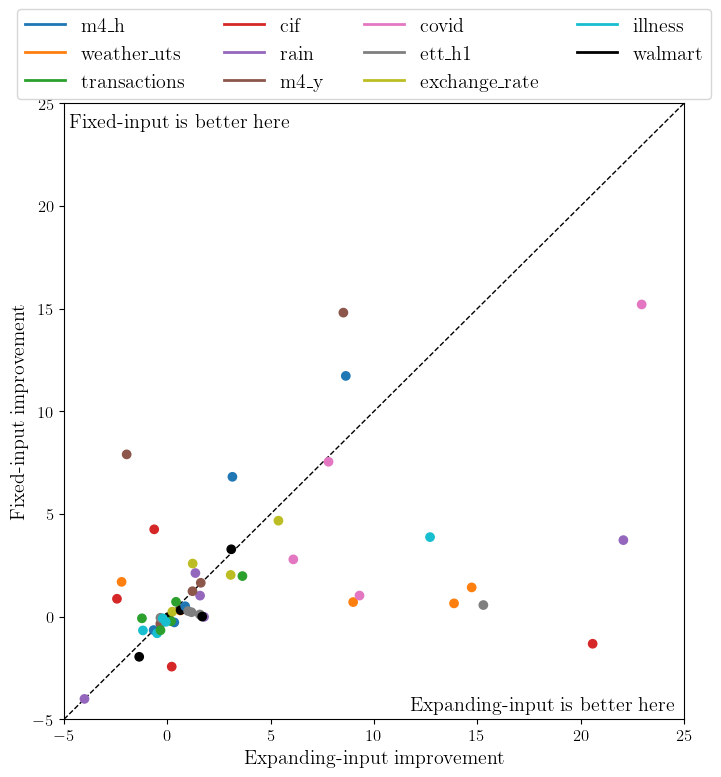

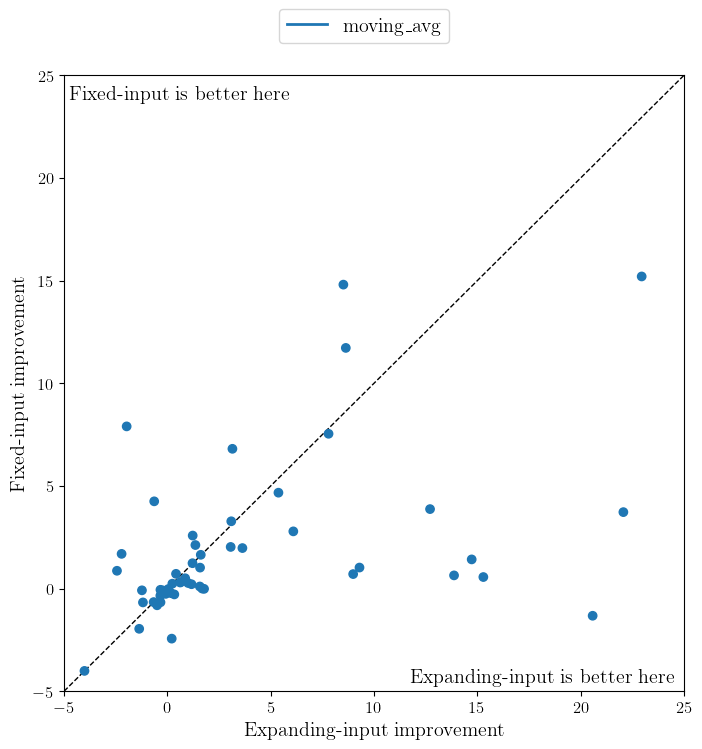

In [ ]:
assert error_reduction_exp1.shape == error_reduction_exp2.shape

color_names = list(TABLEAU_COLORS.keys())
color_names.append("black")
color_names = np.array(color_names)

error_reduction_exp1 = np.nanmax(error_reduction_exp1,axis=-1,keepdims=True)
error_reduction_exp2 = np.nanmax(error_reduction_exp2,axis=-1,keepdims=True)

for color_axis in [0,1,2]:
    colors = color_names[np.arange(error_reduction_exp1.shape[color_axis])]
    if color_axis == 0:
        color = np.tile(colors, (error_reduction_exp1.shape[1], error_reduction_exp2.shape[2],1)).transpose(2,0,1)
    elif color_axis == 1:
        color = np.tile(colors, (error_reduction_exp1.shape[0], error_reduction_exp2.shape[2],1)).transpose(0,2,1)
    elif color_axis == 2:
        color = np.tile(colors, (error_reduction_exp1.shape[0], error_reduction_exp2.shape[1],1))

    filter_1 = ~np.isnan(error_reduction_exp1)
    filter_2 = ~np.isnan(error_reduction_exp2)
    improvement_1 = error_reduction_exp1[filter_1]
    improvement_2 = error_reduction_exp2[filter_2]
    color = color[filter_2]

    win_count_expanding = len(improvement_2[improvement_2 > improvement_1])
    tie_count_expanding = len(improvement_2[improvement_2 == improvement_1])
    loss_count_expanding = len(improvement_2[improvement_2 < improvement_1])

    fig, ax = plt.subplots(figsize=(8,8))

    ax.scatter(y=improvement_1, x=improvement_2, c=color)
    ax.set_xlabel("Expanding-input improvement", fontdict={"fontsize": "x-large"})
    ax.set_ylabel("Fixed-input improvement", fontdict={"fontsize": "x-large"})
    ax.tick_params(axis="both", labelsize="large")

    min_lim = -5
    max_lim = 25
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)

    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], lw=1, linestyle="--", color="black", zorder=0)
    ax.text(x=ax.get_xlim()[1]*0.98, y=ax.get_ylim()[0]*0.95,s="Expanding-input is better here", ha="right", va="bottom", fontsize="x-large")
    ax.text(x=ax.get_xlim()[0]*0.95, y=ax.get_ylim()[1]*0.98,s="Fixed-input is better here", ha="left", va="top", fontsize="x-large")

    if color_axis == 0:
        legend_artists = dict(zip([format_algorithm_name(algo, long=False) for algo in c.algorithm_names_input_decomp], [Line2D([0], [0], color=c, lw=2) for c in colors]))
        bbox_y = 0.8
        bbox_x = 0.23
        ncol = 1
        textbox_props = dict(boxstyle="round", edgecolor="black", facecolor="lightgrey", alpha=0.9)
        ax.text(
            max_lim*0.9, -2.5,
            f"W: {win_count_expanding}\nL: {loss_count_expanding}",
            fontsize=12,
            color="black",
            ha="center",
            va="center",
            bbox=textbox_props
        )
        figname = "unaltered_expanding_fixed_scatter_by_algo.pdf"
    elif color_axis == 1:
        legend_artists = dict(zip(c.dataset_names, [Line2D([0], [0], color=c, lw=2) for c in colors]))
        bbox_y = 1.01
        bbox_x = 0.5
        ncol = 4
        figname = "unaltered_expanding_fixed_scatter_by_dataset.pdf"
    elif color_axis == 2:
        legend_artists = dict(zip(c.decomp_input_names[1:], [Line2D([0], [0], color=c, lw=2) for c in colors]))
        bbox_y = 0.975
        bbox_x = 0.5
        ncol = 3
        figname = "unaltered_expanding_fixed_scatter_by_decomp.pdf"

    fig.legend(handles=list(legend_artists.values()), 
            labels=list(legend_artists.keys()), 
            ncol=ncol,
            loc="upper center", 
            fontsize="x-large", 
            bbox_to_anchor=(bbox_x, bbox_y))
    fig.savefig("plots/"+figname,bbox_inches="tight")

In [250]:
print("\\begin{table}[h]")
print("\centering")
print("\caption{Error reduction from using no decomposition for the unaltered models under a fixed-input setup.}")
print("\\begin{tabular}{c|c", end="")
for _ in range(len(c.dataset_names)):
    print("|c",end="")
print("}")
print(" &",end="")  
for dataset in c.dataset_names:
    print(f" & {format_dataset_name(dataset,long=False)}",end="")
print("\\\\")
print("\midrule")


rows = []
for algorithm in c.algorithm_names_input_decomp:
    if algorithm == "NonStationaryTransformer":
        rows.append("\multirow{"+str(len(c.decomp_input_names)-1)+"}{*}{\\rotatebox{90}{Non-Stationary}} & " + format_decomp_name(c.decomp_input_names[1],long=False) + " ")
    else:
        rows.append("\multirow{"+str(len(c.decomp_input_names)-1)+"}{*}{\\rotatebox{90}{" + format_algorithm_name(algorithm) + "}} & " + format_decomp_name(c.decomp_input_names[1],long=False) + " ")
    for decomp in c.decomp_input_names[2:]:
        rows.append(" & " + format_decomp_name(decomp,long=False) + " ")

for i, dataset in enumerate(c.dataset_names):
    means = error_reduction_exp1[:,i,:]
    mean = np.nanmean(means,axis=1)
    max_indices = np.nanargmax(means,axis=1)
    for j, name in enumerate(c.algorithm_names_input_decomp):
        for k, decomp in enumerate(c.decomp_input_names[1:]):
            if np.isnan(means[j][k]):
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& - "
            elif k == max_indices[j]:
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& \\textbf{" + "{:.2f}".format(means[j][k]) + "}\% "
            else:
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& {:.2f}\% ".format(means[j][k])

for i, row in enumerate(rows):
    print(row + "\\\\")
    if i > 0 and (i+1) % (len(c.decomp_input_names)-1) == 0 and i < len(rows)-1:
        print("\midrule")

print("\end{tabular}")
print("\label{tab:error_reduction_unaltered_models_fixed_input}")
print("\end{table}")

\begin{table}[h]
\centering
\caption{Error reduction from using no decomposition for the unaltered models under a fixed-input setup.}
\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c|c|c}
 & & M4(H) & Weather & Trans. & CIF & Rain & M4(Y) & Covid & ETTh1 & Exch. & Illness & Walmart\\
\midrule
\multirow{6}{*}{\rotatebox{90}{DLinear}} & MA & \textbf{-0.66}\% & 0.13\% & -0.15\% & \textbf{-28.71}\% & -4.01\% & \textbf{-0.35}\% & -15.38\% & 0.14\% & -6.00\% & \textbf{-0.67}\% & -0.07\% \\
 & TS & -1.09\% & - & 0.51\% & - & -5.42\% & - & - & 0.10\% & \textbf{2.03}\% & - & - \\
 & STL & -1.09\% & - & \textbf{0.72}\% & - & -5.42\% & - & - & 0.13\% & -2.57\% & - & - \\
 & F(BL) & -1.73\% & \textbf{0.30}\% & 0.08\% & -49.91\% & -6.91\% & -2.52\% & -67.63\% & 0.19\% & -2.18\% & -6.22\% & -0.18\% \\
 & F(k) & -0.73\% & 0.28\% & -0.12\% & -28.71\% & \textbf{-4.01}\% & -0.35\% & \textbf{-15.38}\% & 0.19\% & -6.17\% & -0.67\% & -0.07\% \\
 & Wav & -1.86\% & 0.29\% & 0.16\% & -55.20\% & -6.91\% & -2.55\% & -97.2

In [253]:
print("\\begin{table}[h]")
print("\centering")
print("\caption{Error reduction from using no decomposition for the unaltered models under an expanding-input setup.}")
print("\\begin{tabular}{c|c", end="")
for _ in range(len(c.dataset_names)):
    print("|c",end="")
print("}")
print(" &",end="")  
for dataset in c.dataset_names:
    print(f" & {format_dataset_name(dataset,long=False)}",end="")
print("\\\\")
print("\midrule")


rows = []
for algorithm in c.algorithm_names_input_decomp:
    if algorithm == "NonStationaryTransformer":
        rows.append("\multirow{"+str(len(c.decomp_input_names)-1)+"}{*}{\\rotatebox{90}{Non-Stationary}} & " + format_decomp_name(c.decomp_input_names[1],long=False) + " ")
    else:
        rows.append("\multirow{"+str(len(c.decomp_input_names)-1)+"}{*}{\\rotatebox{90}{" + format_algorithm_name(algorithm) + "}} & " + format_decomp_name(c.decomp_input_names[1],long=False) + " ")
    for decomp in c.decomp_input_names[2:]:
        rows.append(" & " + format_decomp_name(decomp,long=False) + " ")

for i, dataset in enumerate(c.dataset_names):
    means = error_reduction_exp2[:,i,:]
    mean = np.nanmean(means,axis=1)
    max_indices = np.nanargmax(means,axis=1)
    for j, name in enumerate(c.algorithm_names_input_decomp):
        for k, decomp in enumerate(c.decomp_input_names[1:]):
            if np.isnan(means[j][k]):
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& - "
            elif k == max_indices[j]:
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& \\textbf{" + "{:.2f}".format(means[j][k]) + "}\% "
            else:
                rows[(j*(len(c.decomp_input_names)-1))+k] += "& {:.2f}\% ".format(means[j][k])

for i, row in enumerate(rows):
    print(row + "\\\\")
    if i > 0 and (i+1) % (len(c.decomp_input_names)-1) == 0 and i < len(rows)-1:
        print("\midrule")

print("\end{tabular}")
print("\label{tab:error_reduction_unaltered_models_expanding_input}")
print("\end{table}")

\begin{table}[h]
\centering
\caption{Error reduction from using no decomposition for the unaltered models under an expanding-input setup.}
\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c|c|c}
 & & M4(H) & Weather & Trans. & CIF & Rain & M4(Y) & Covid & ETTh1 & Exch. & Illness & Walmart\\
\midrule
\multirow{6}{*}{\rotatebox{90}{DLinear}} & MA & \textbf{-0.66}\% & 0.16\% & \textbf{0.42}\% & \textbf{-56.80}\% & \textbf{-4.01}\% & -0.34\% & 2.38\% & 0.36\% & -0.10\% & \textbf{-1.18}\% & 0.04\% \\
 & TS & -1.04\% & - & -0.56\% & - & -5.41\% & - & - & -3.94\% & -33.35\% & - & - \\
 & STL & -1.05\% & - & 0.34\% & - & -5.42\% & - & - & \textbf{1.17}\% & -1.57\% & - & - \\
 & F(BL) & -1.82\% & 0.28\% & -0.48\% & -125.69\% & -6.93\% & -2.53\% & 2.10\% & -1.04\% & -33.60\% & -4.71\% & -0.38\% \\
 & F(k) & -0.69\% & 0.27\% & 0.28\% & -56.80\% & -4.01\% & \textbf{-0.34}\% & 2.52\% & -5.02\% & -9.36\% & -10.53\% & \textbf{0.05}\% \\
 & Wav & -8.22\% & \textbf{0.62}\% & -16.07\% & -149.78\% & -14.61\% & -1.99\